# Importando base de datos

In [48]:
import pandas as pd

In [49]:
pd.read_csv('credit_card.csv')

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
...,...,...,...,...,...,...,...,...
1495,54198,Yes,3.Graduate School,Single,27,295.0780,0.0000,1
1496,45165,No,2.University,Married,55,23637.8555,1144.1800,0
1497,78286,No,3.Graduate School,Single,34,962.9178,962.9178,0
1498,6022,No,2.University,Married,44,864.7592,864.7592,0


In [50]:
datos = pd.read_csv('credit_card.csv')

In [51]:
datos.head()

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [52]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


# Traduciendo variables

In [53]:
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

In [54]:
dic_columnas = {
    'LIMIT_BAL' : 'limite', 
    'CHECKING_ACCOUNT' : 'cuenta_corriente', 
    'EDUCATION' : 'escolaridad', 
    'MARRIAGE' : 'estado_civil', 
    'AGE' : 'edad',
    'BILL_AMT' : 'valor_factura', 
    'PAY_AMT' : 'valor_pago', 
    'DEFAULT' : 'moroso'
}

In [55]:
tarjetas = datos.rename(columns = dic_columnas)

In [56]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [57]:
tarjetas.cuenta_corriente.unique()

array(['Yes', 'No'], dtype=object)

In [58]:
tarjetas["cuenta_corriente"].replace("Yes","Si",inplace=True)

In [59]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.University,Married,24,934.0122,0.0000,1
1,36132,Si,2.University,Single,26,519.3975,0.0000,1
2,27099,Si,2.University,Single,34,4223.5297,457.0698,0
3,15055,Si,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [60]:
tarjetas.escolaridad.unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [61]:
dic_escolaridad = {
    '2.University' : '2.Universidad', 
    '3.Graduate School' : '3.Pos-graduación', 
    '1.High School' : '1.Colegio'
}

In [62]:
tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escolaridad)

In [63]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Married,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Single,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Single,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Married,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Single,29,124060.1253,16560.5000,0


In [64]:
tarjetas.estado_civil.unique()

array(['Married', 'Single'], dtype=object)

In [65]:
dic_estado_civil = {
    'Married' : 'Casado/a', 
    'Single' : 'Soltero/a'
}

In [66]:
tarjetas.estado_civil = tarjetas.estado_civil.map(dic_estado_civil)

In [67]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0


## Analisis visual de datos

In [68]:
import seaborn as sns

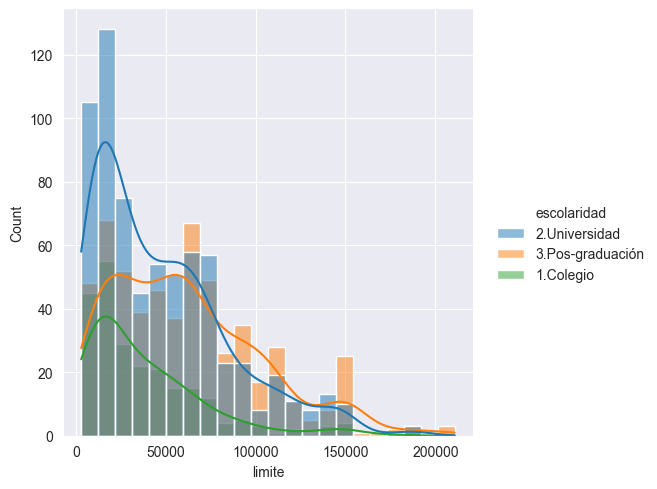

In [69]:
sns.displot(data=tarjetas,x='limite', kde=True, hue='escolaridad')

## Segundo analisis

se comprueba que tanta gente usa el limite de uso en su cuenta

In [70]:
tarjetas['Indice_de_uso'] = tarjetas['valor_factura']/tarjetas['limite']
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,Indice_de_uso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046


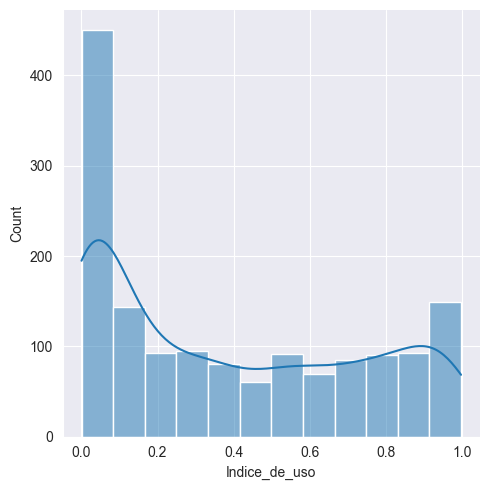

In [72]:
sns.displot(data=tarjetas,x='Indice_de_uso', kde=True, )

Hay un publico significativo no usa el limite que tienen

## Estilos y colores

In [73]:
sns.set_style('darkgrid')

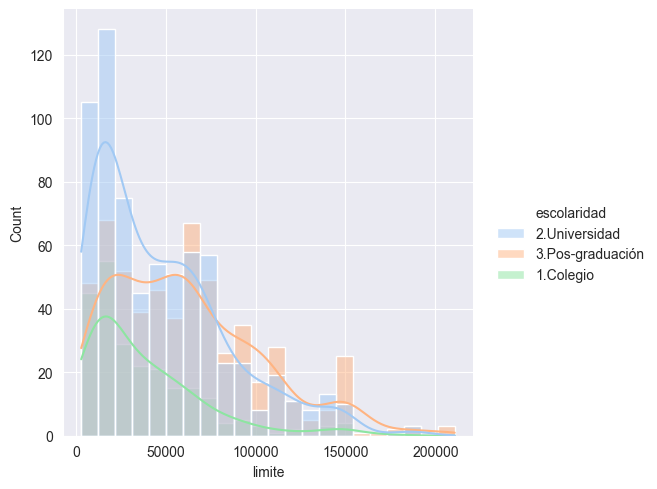

In [74]:
sns.displot(data=tarjetas,x='limite', kde=True, hue='escolaridad', palette='pastel')


## analisis de variables categoricas

<Axes: xlabel='cuenta_corriente', ylabel='count'>

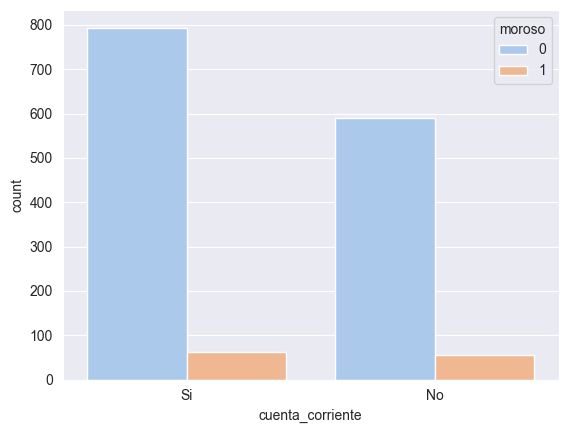

In [78]:
sns.countplot(data= tarjetas ,x='cuenta_corriente',palette='pastel',hue='moroso')

Se puede comprender que la gente morosa es mas comun que no tenga cuenta corriente

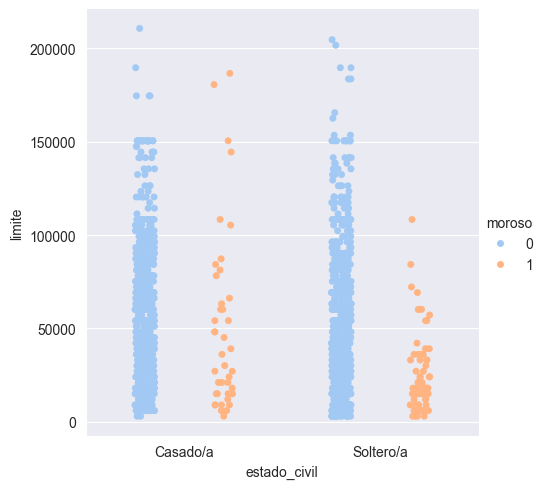

In [85]:
sns.catplot(data=tarjetas,x='estado_civil',y='limite', palette= 'pastel', hue='moroso',dodge = True)

Se puede entender que las personas soleteras y morosas tienen limites mas altos

c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='Indice_de_uso'>

c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


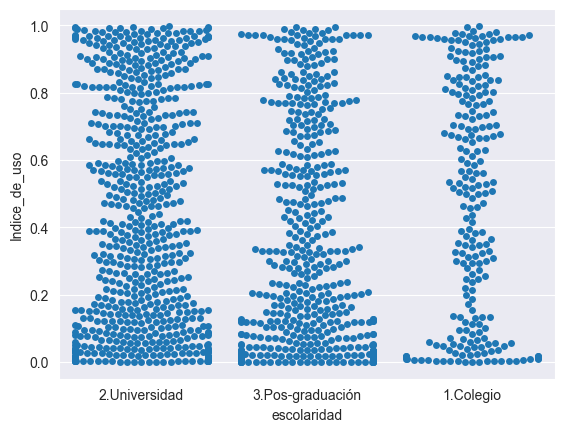

In [86]:
sns.swarmplot(data=tarjetas,x='escolaridad',y = 'Indice_de_uso')

## Test de hipotesis

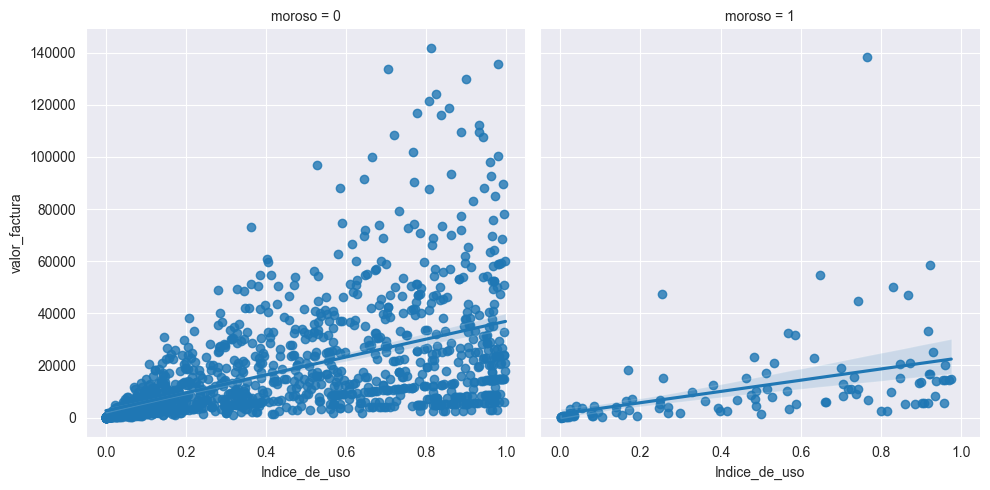

In [89]:
sns.lmplot(data=tarjetas, x = 'Indice_de_uso', y = 'valor_factura', col = 'moroso')

In [90]:
from scipy.stats import ranksums

Ambas hipotesis 

H<sup>null<sup>


La distribucion de los grupos morosos y no morosos es la misma 

H<sup>alternativa<sup>

La distribucion de los grupos morosos y no morosos no es la misma

In [92]:
moroso = tarjetas.query('moroso == 1').valor_factura
moroso

0         934.0122
1         519.3975
38      10891.0881
45        330.6078
47       7316.7300
           ...    
1448     1619.0147
1472    17048.2820
1475     4402.0820
1478     1851.1628
1495      295.0780
Name: valor_factura, Length: 117, dtype: float64

In [94]:
no_moroso = tarjetas.query('moroso == 0').valor_factura
no_moroso

2         4223.5297
3        14522.9563
4       124060.1253
5          114.4180
6         4244.3056
           ...     
1494     32698.2556
1496     23637.8555
1497       962.9178
1498       864.7592
1499     97022.8508
Name: valor_factura, Length: 1383, dtype: float64

se comprueba si estos dos grupos la diferencia en la distribucion es estadisticamente significativa
 

In [95]:
ranksums(moroso,no_moroso)

RanksumsResult(statistic=-2.562530598426702, pvalue=0.010391243081223555)

Con valores de pvalue < 0.05  ya sirven para aceptar la hipotesis alternativa

por lo tanto la distribucion de los grupos morosos y no morosos no es la misma 
